In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.xls')

In [2]:
# pandas_profiling.ProfileReport(stud_math)
# интересная вещь, но рассмотреть в будущем. Показала высокую корреляцию 'studytime, granular' и 'studytime',
# что позволило вычеркнуть этот параметр из рассмотрения

## Первичная обработка

In [3]:
# Функция для числовых столбцов
def first_proc(col):  
    IQR = stud_math[col].quantile(0.75) - stud_math[col].quantile(0.25)
    perc25 = stud_math[col].quantile(0.25)
    perc75 = stud_math[col].quantile(0.75)
    miss = round(100 - (stud_math[col].count() / len(stud_math))*100, 2)
    print('колонка: "{}",' .format(col), "процент пропусков {}%" .format(miss))
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    stud_math[col].hist()
    display(stud_math[(stud_math[col] < (perc25 - 1.5*IQR))|(stud_math[col] > (perc75 + 1.5*IQR))])

# Функция для категорияльных столбцов
def second_proc(col):
    sns.boxplot(x = col, y = 'score', data = stud_math)
    miss = round(100 - (stud_math[col].count() / len(stud_math))*100, 2)  
    print('колонка: "{}",' .format(col), "процент пропусков {}%" .format(miss))
    print('количество уникальных значений: {}' .format(stud_math[col].nunique()))
    print(stud_math[col].unique())

# Функция определения значимости (тест Стьюдента)
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

## Первичный осмотр данных

In [4]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Числовых столбцов: 12
Строковых столбцов: 17 (условно строковых)

### Распределение признака для числовых переменных, устранение выбросов

колонка: "score", процент пропусков 1.52%
25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score


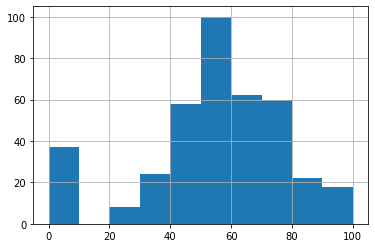

In [5]:
# баллы по госэкзамену по математике
first_proc('score')

# удаляем пропуски из целевой переменной
stud_math = stud_math[stud_math.score.notna()]

# значения типа 0, оставляем, это могут быть не сдавшие, не явившиеся на экзамен,
# или не прошедшие по минимальному баллу. Хотя и похожи на выброс.

колонка: "absences", процент пропусков 2.83%
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,-6.0,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,-3.0,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,-9.0,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
216,GP,F,17,U,GT3,T,4.0,3.0,other,NaN,reputation,mother,1.0,2.0,2.0,no,no,yes,no,yes,-6.0,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
260,GP,F,18,U,GT3,NaN,4.0,3.0,NaN,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,3.0,1.0,2.0,2.0,21.0,90.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0


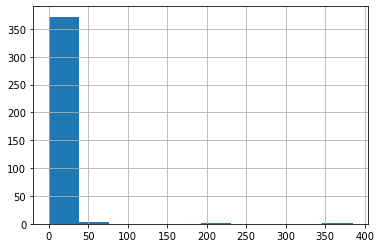

In [6]:
# Количество пропущенных занятий
first_proc('absences')

# есть пропуски (процент не значительный), заменим их на медиану.
stud_math.absences[stud_math.absences.isna()] = stud_math.absences.median()

# наблюдается так же наличие выбросов. Пока не ясно что с ними делать
# вполне вероятно, что это заядлые прогульщики либо у них проблемы со здоровьем

колонка: "absences", процент пропусков 0.0%
количество уникальных значений: 36
[  6.   4.  10.   2.   0.  16.  14.   7.   8.  25.  12.  54.  18.  26.
  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.  30.
  19.   9.  11.  38.  40.  23.  17. 212.]


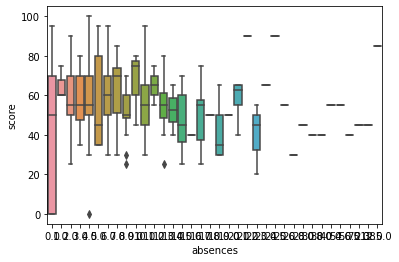

In [7]:
# зависимость оценки от количества прогулов.
second_proc('absences')

<ipython-input-8-674402dedb3f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_math.absences[stud_math.absences >= 30] = stud_math.absences.median()


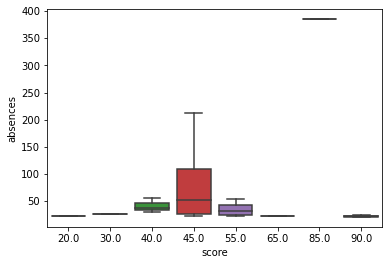

In [8]:
# поработаем с выбросами
# исключим единичные случае прогулов по максимальному количеству
df_absences = stud_math[stud_math.absences > 20]
# количество пропущенных занятий напрямую коррелируется с goout, freetime, famrel, romantic и прочими
# абсолютно точно влияет на сдачу экзамена..
sns.boxplot(x = 'score', y = 'absences', data = df_absences)

# прогульщики, гуляют с друзьями.(goout, freetime)
# их еденицы в расчет не берем, так же заменим их медианой
stud_math.absences[stud_math.absences >= 30] = stud_math.absences.median()

колонка: "absences", процент пропусков 0.0%
25-й перцентиль: 0.0, 75-й перцентиль: 7.0, IQR: 7.0,  Границы выбросов: [-10.5, 17.5].


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,-6.0,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
118,GP,M,17,R,GT3,T,1.0,3.0,other,NaN,course,father,3.0,2.0,1.0,no,yes,no,yes,yes,-6.0,yes,NaN,no,NaN,2.0,4.0,5.0,20.0,40.0
123,GP,M,16,U,GT3,T,4.0,4.0,health,other,course,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,4.0,4.0,5.0,18.0,65.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,-3.0,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0
203,GP,F,17,R,GT3,T,2.0,2.0,other,other,reputation,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,3.0,2.0,3.0,18.0,30.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,-9.0,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
216,GP,F,17,U,GT3,T,4.0,3.0,other,NaN,reputation,mother,1.0,2.0,2.0,no,no,yes,no,yes,-6.0,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
234,GP,M,16,U,LE3,NaN,1.0,1.0,other,other,home,mother,NaN,2.0,0.0,no,NaN,yes,no,yes,-6.0,yes,yes,no,3.0,4.0,2.0,5.0,18.0,30.0


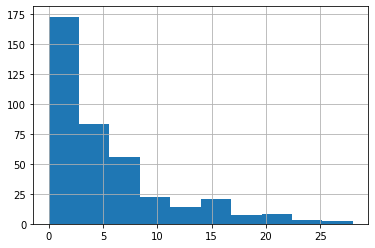

In [9]:
# рапределение по прогулам получаем следующее
first_proc('absences')

# влияет

колонка: "age", процент пропусков 0.0%
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0


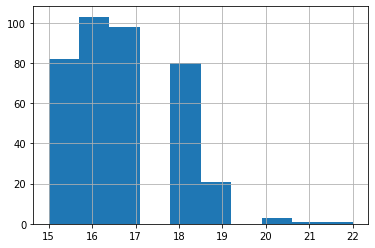

In [10]:
# возраст
first_proc('age')

# есть выброс, но он в пределах условий проекта
# прослеживается, подавляющее число сдающих до 19 лет.
# после 19, это скорее исключение чем правило..

колонка: "age", процент пропусков 0.0%
количество уникальных значений: 8
[18 17 15 16 19 22 20 21]


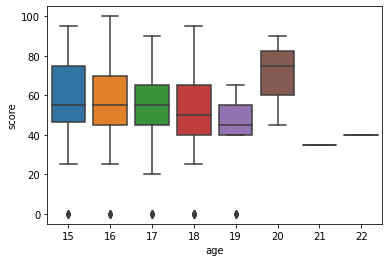

In [11]:
# 
second_proc('age')

# после 20 лет оценки существенно ниже, но и выборка по ним не велика
# влияет

### Оценка количества уникальных значений для номинативных переменных, преобразование данных

колонка: "school", процент пропусков 0.0%
количество уникальных значений: 2
['GP' 'MS']


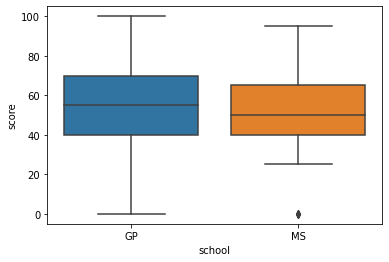

In [12]:
# аббревиатура школы, в которой учится ученик
second_proc('school')

# не влияет

колонка: "sex", процент пропусков 0.0%
количество уникальных значений: 2
['F' 'M']


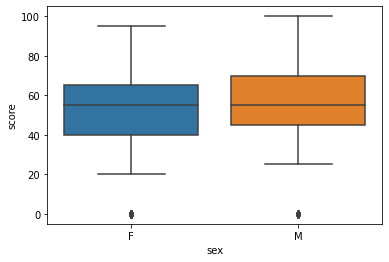

In [13]:
# пол ученика ('F' - женский, 'M' - мужской)
second_proc('sex')

# не влияет

колонка: "address", процент пропусков 3.86%
количество уникальных значений: 2
['U' nan 'R']


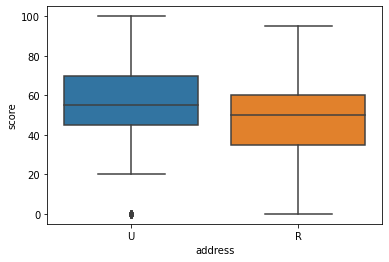

In [14]:
# тип адреса ученика ('U' - городской, 'R' - за городом)
second_proc('address')

# не влияет

колонка: "famsize", процент пропусков 6.94%
количество уникальных значений: 2
[nan 'GT3' 'LE3']


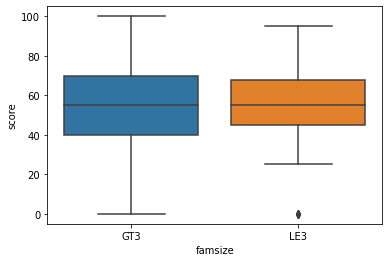

In [15]:
# размер семьи('LE3' <= 3, 'GT3' >3)
second_proc('famsize')

# не влияет

колонка: "Pstatus", процент пропусков 11.57%
количество уникальных значений: 2
['A' nan 'T']


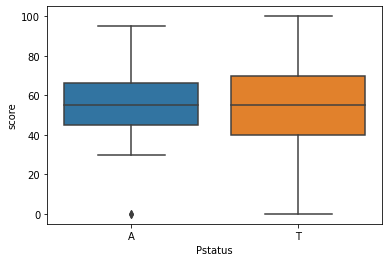

In [16]:
# статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
second_proc('Pstatus')

# не влияет

колонка: "Medu", процент пропусков 0.77%
количество уникальных значений: 5
[ 4.  1.  3.  2. nan  0.]


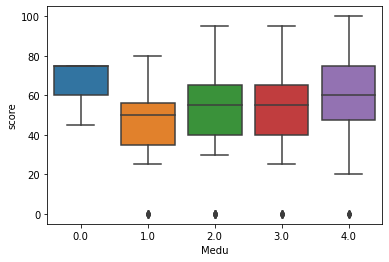

In [17]:
# образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
second_proc('Medu')

# мать без образования влияет на положительную оценку больше и лучше чем остальные.
# в остальных случаюх влияние умеренно среднее

колонка: "Medu", процент пропусков 0.77%
количество уникальных значений: 2
[ 1. nan  0.]


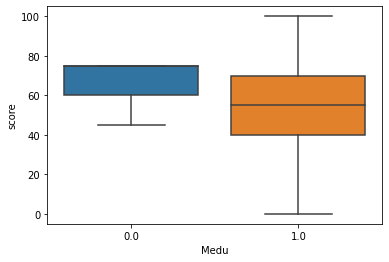

In [18]:
# поэтому объеденим другие категории в одну - 1.0
stud_math.Medu[stud_math['Medu'] >= 1.0 ] = 1.0

second_proc('Medu')
# влияет (0 - без образования, 1 - с образованием)

колонка: "Fedu", процент пропусков 6.17%
количество уникальных значений: 6
[ 4.  1.  2.  3. 40. nan  0.]


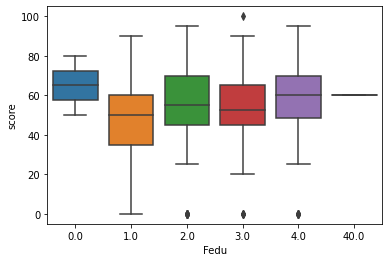

In [19]:
# образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
second_proc('Fedu')

# есть выброс, не типичное значение 40. возможно опечатка от 4. Заменим.
stud_math['Fedu'][stud_math['Fedu'] == 40] = 4

# отец без образования влияет на положительную оценку больше и лучше чем остальные.
# отец с образованием 4 класса, не влияет.
# в остальных случаюх влияние умеренно среднее
# влияет

колонка: "Mjob", процент пропусков 4.88%
количество уникальных значений: 5
['at_home' 'health' 'other' 'services' 'teacher' nan]


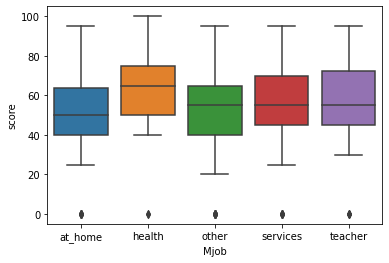

In [20]:
# работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
second_proc('Mjob')

# немного выделяется на фоне других, health возможно это имеет влияние
# мать health влияет на получение более высокой оценки, чем все остальные

колонка: "Mjob", процент пропусков 4.88%
количество уникальных значений: 2
['other' 'health' nan]


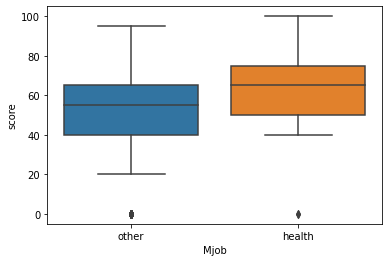

In [21]:
# поэтому объеденим другие категории в одну - other
job_list = ['teacher','services','at_home'] 
job = '|'.join(job_list)
stud_math['Mjob'][stud_math['Mjob'].str.contains(job, na = False)] = 'other'

second_proc('Mjob')
# влияет

колонка: "Fjob", процент пропусков 9.25%
количество уникальных значений: 5
['teacher' 'other' nan 'health' 'services' 'at_home']


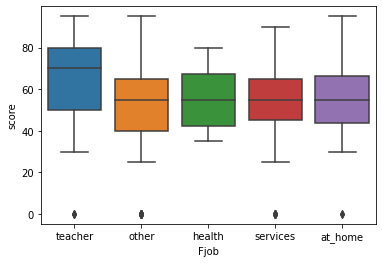

In [22]:
# работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
second_proc('Fjob')

# немного выделяется на фоне других, teacher возможно это имеет влияние
# отец teacher влияет на получение более высокой оценки, чем все остальные
# поэтому объеденим другие категории в одну - other

колонка: "Fjob", процент пропусков 9.25%
количество уникальных значений: 2
['teacher' 'other' nan]


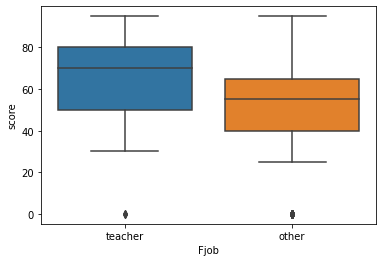

In [23]:
# поэтому объеденим другие категории в одну - other
job_list = ['health','services','at_home'] 
job = '|'.join(job_list)
stud_math['Fjob'][stud_math['Fjob'].str.contains(job, na = False)] = 'other'

second_proc('Fjob')
# влияет

колонка: "reason", процент пропусков 4.37%
количество уникальных значений: 4
['course' 'other' 'home' 'reputation' nan]


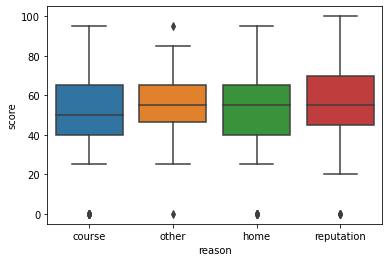

In [24]:
# причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
second_proc('reason')

# немного влияет репутация

колонка: "guardian", процент пропусков 7.97%
количество уникальных значений: 3
['mother' 'father' 'other' nan]


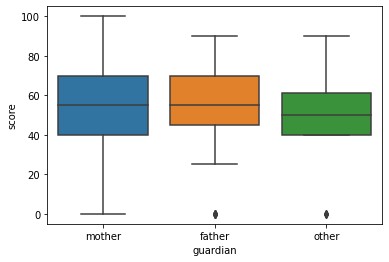

In [25]:
# опекун ('mother' - мать, 'father' - отец, 'other' - другое)
second_proc('guardian')

# не совсем понимаю эту переменную. other - это отец и мать или никого, или усыновили
# other оказывает не сильное негативное влияние

колонка: "traveltime", процент пропусков 7.2%
количество уникальных значений: 4
[ 2.  1.  3. nan  4.]


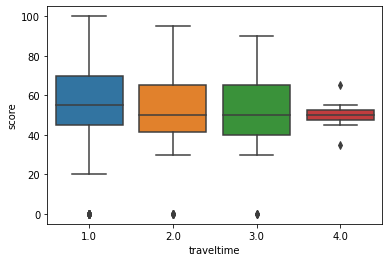

In [26]:
# время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
second_proc('traveltime')

# влият на разброс, но и на возможность получения более высокого/низкого бала.
# чем дольше ты едешь, тем средне ты учишся
# но в среднем не влияет

колонка: "studytime", процент пропусков 1.8%
количество уникальных значений: 4
[ 2.  3.  1. nan  4.]


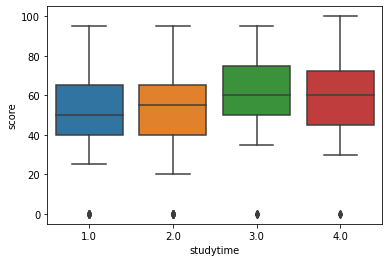

In [27]:
# время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
second_proc('studytime')

# занятия помимо школы более 5 часов влияет, и менее 2

колонка: "studytime", процент пропусков 1.8%
количество уникальных значений: 3
[ 2.  3.  1. nan]


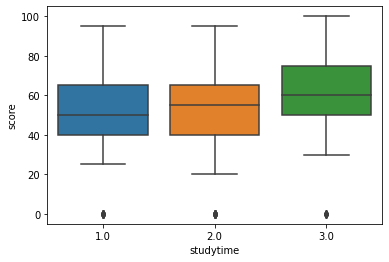

In [28]:
# объеденим группу 30 и 4.0 в группу более пяти часов

stud_math['studytime'][stud_math['studytime'] >= 3.0] = 3.0

second_proc('studytime')

колонка: "studytime, granular", процент пропусков 1.8%
количество уникальных значений: 4
[ -6.  -9.  -3.  nan -12.]


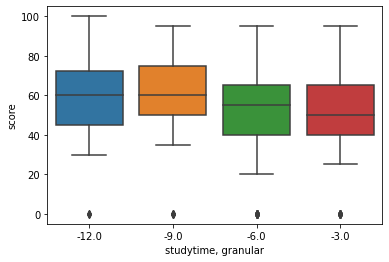

In [29]:
second_proc('studytime, granular')

# он не влияет, его можно удалить. Сильная (100%) корреляция со столбцом studytime
# для проверки использовал код ниже:
# stud_math['studytime, granular'] = stud_math['studytime, granular']/-3

del stud_math['studytime, granular']

колонка: "failures", процент пропусков 5.66%
количество уникальных значений: 4
[ 0.  3. nan  2.  1.]


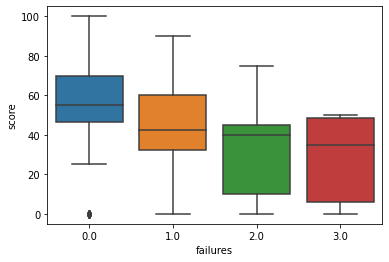

In [30]:
# количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
second_proc('failures')

# либо они без пробных экзаменов, либо достаточно много раз пытались и набивали руку
# влияет

колонка: "schoolsup", процент пропусков 2.31%
количество уникальных значений: 2
['yes' 'no' nan]


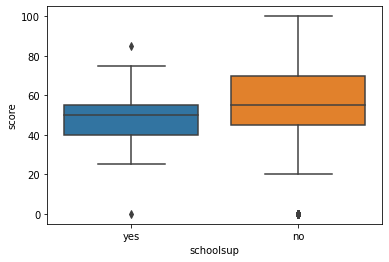

In [31]:
# дополнительная образовательная поддержка (yes или no)
second_proc('schoolsup')

# не влияет

колонка: "famsup", процент пропусков 9.77%
количество уникальных значений: 2
['no' 'yes' nan]


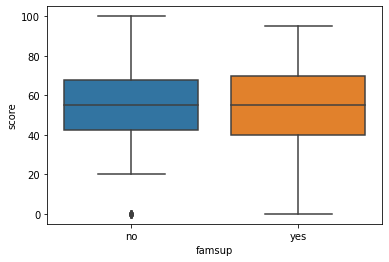

In [32]:
# семейная образовательная поддержка (yes или no)
second_proc('famsup')

# не влияет

колонка: "paid", процент пропусков 10.03%
количество уникальных значений: 2
['no' nan 'yes']


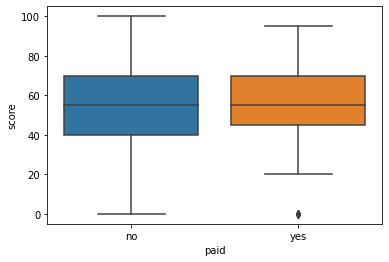

In [33]:
# дополнительные платные занятия по математике (yes или no)
second_proc('paid')

# не влияет

колонка: "activities", процент пропусков 3.6%
количество уникальных значений: 2
['no' 'yes' nan]


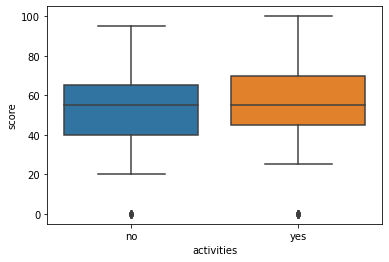

In [34]:
# дополнительные внеучебные занятия (yes или no)
second_proc('activities')

# не влияет

колонка: "nursery", процент пропусков 3.86%
количество уникальных значений: 2
['yes' 'no' nan]


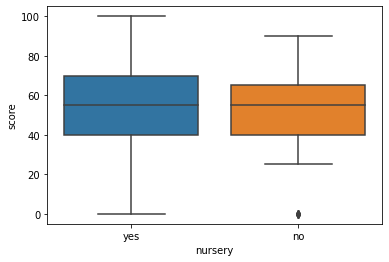

In [35]:
# посещал детский сад (yes или no)
second_proc('nursery')

# не влияет

колонка: "higher", процент пропусков 5.14%
количество уникальных значений: 2
['yes' nan 'no']


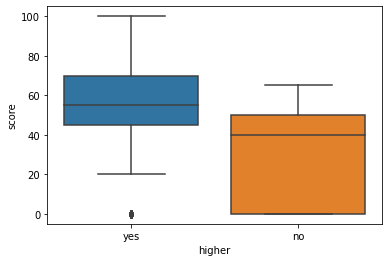

In [36]:
# хочет получить высшее образование (yes или no)
second_proc('higher')

# желание очевидно влияет на результат

колонка: "internet", процент пропусков 8.74%
количество уникальных значений: 2
[nan 'yes' 'no']


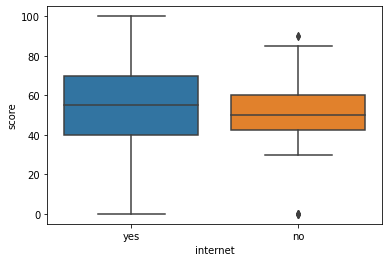

In [37]:
# наличие интернета дома (yes или no)
second_proc('internet')

# не влияет

колонка: "romantic", процент пропусков 7.97%
количество уникальных значений: 2
['no' nan 'yes']


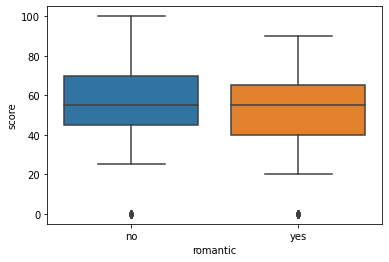

In [38]:
# в романтических отношениях (yes или no)
second_proc('romantic')

# не влияет

колонка: "famrel", процент пропусков 6.94%
количество уникальных значений: 6
[ 4.  5.  3. nan -1.  2.  1.]


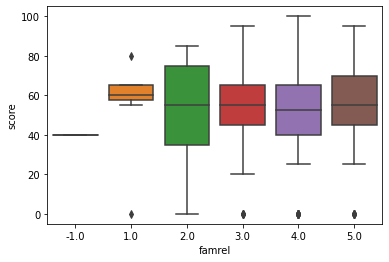

In [39]:
# семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
second_proc('famrel')

# есть выброс. спишем на опечатку, логичности это не убавит, у человека реально плохо с родителями.
stud_math['famrel'][stud_math['famrel'] == -1] = 1

# влияет

колонка: "freetime", процент пропусков 2.31%
количество уникальных значений: 5
[ 3.  2.  4.  1.  5. nan]


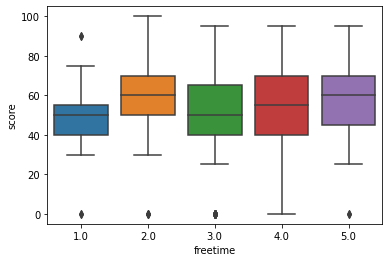

In [40]:
# свободное время после школы (от 1 - очень мало до 5 - очень мого)
second_proc('freetime')

# влияет

колонка: "goout", процент пропусков 1.8%
количество уникальных значений: 5
[ 4.  3.  2.  1.  5. nan]


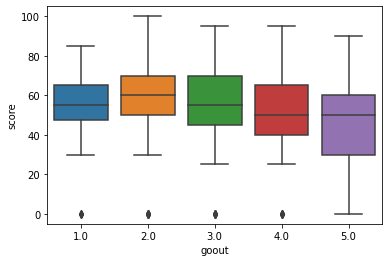

In [41]:
# проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
second_proc('goout')

# влияет

колонка: "health", процент пропусков 3.86%
количество уникальных значений: 5
[ 3.  5.  1.  2.  4. nan]


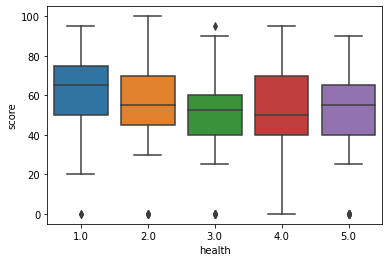

In [42]:
# текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
second_proc('health')

# влияет

### Корреляционный анализ, отбор не коррелирующих переменных

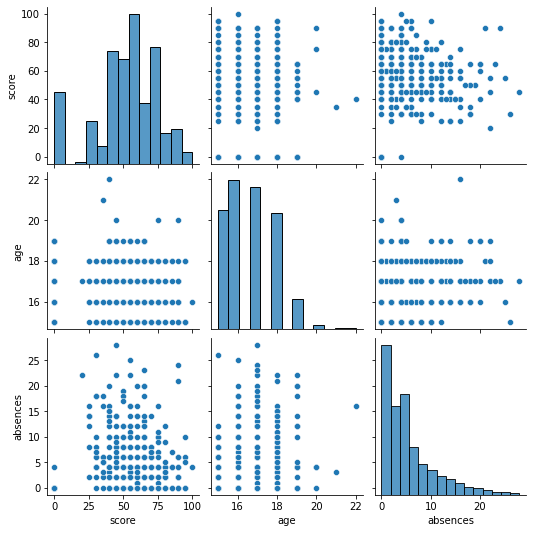

In [43]:
sns.pairplot(
    stud_math,
    x_vars=["score", "age", "absences"],
    y_vars=["score", "age", "absences"],
)
# ни о чем мне этот график не говорит..

In [44]:
# построим таблицу корреляции
stud_math[["score", "age", "absences"]].corr()

# сильной корреляции не наблюдается, можно оставить все значения.
# оставим параметры: score, age, absences

,score,age,absences
score,1.000000,-0.155726,0.073395
age,-0.155726,1.000000,0.147941
absences,0.073395,0.147941,1.000000


### Анализ номинативных переменных

In [45]:
# тест Стьюдента на определения значимых атрибутов

for col in stud_math.columns:
    if stud_math[col].dtype == 'object':
        get_stat_dif(col)

# определены следующие значимые столбцы:
# address, Mjob, higher, romantic

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [46]:
stud_math_fmod = stud_math[['score', 'age', 'absences', 'address', 'Mjob', 'higher', 'romantic']]
stud_math_fmod

,score,age,absences,address,Mjob,higher,romantic
0,30.0,18,6.0,U,other,yes,no
1,30.0,17,4.0,U,other,yes,no
2,50.0,15,10.0,U,other,yes,NaN
3,75.0,15,2.0,U,health,yes,yes
4,50.0,16,4.0,U,other,yes,no
...,...,...,...,...,...,...,...
390,45.0,20,4.0,U,other,yes,no
391,80.0,17,3.0,U,other,yes,no
392,35.0,21,3.0,R,other,NaN,no
393,50.0,18,0.0,R,other,yes,no


## Выводы:
1. В данных достаточно мало пропусков. 
2. Целевой параметр так же имеет небольшое количество пропусков.
3. Максимальное количество пропусков выялено в колонке Pstatus, процент пропусков 11.57%
4. Выбросы найдены в столбцах absences (количество прогулов), Fedu (образование отца), famrel (семейные отношения).
5. После 19 лет количество (и качество) экзаменуемых резко снижается. Наблюдается отрицательная корреляция по параметрам возраст и оценка за экзамен.
6. Самые важные данные, которые предлагается ипользовать в модел, это age, absences, address, Mjob, higher, romantic